# Introduction

In [184]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [185]:
n_runs = 1000
time_break = 30
p_vector = np.array([])

for i in range(n_runs):
    time_counter = 0 
    n = 1000

    # Vector of states
    states = np.repeat("S",n)
    states[0] = "I"

    # Probabilities of entering 
    prob_S_I = 0.9
    prob_I_R = 0.3

    n_S = np.array([len(np.where(states == "S")[0])])
    n_I = np.array([len(np.where(states == "I")[0])])
    n_R = np.array([len(np.where(states == "R")[0])])


    while ("I" in states):
        
        # Get positions of S, I, R
        S_index = np.where(states == "S")[0]
        I_index = np.where(states == "I")[0]
        R_index = np.where(states == "R")[0]

        # Update susceptible
        prob_S_I_t = prob_S_I * len(I_index)/n
        states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


        # Update infected
        states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


        n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
        n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
        n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
        
        time_counter += 1
        
        
    if len(n_I) > time_break:
        p_vector = np.concatenate([p_vector, np.array([1])])
    else:
        p_vector = np.concatenate([p_vector, np.array([0])])
        
likelihood = np.sum(p_vector)/len(p_vector)

print("The likelihood that the disease dies out after {} days: {}".format(time_break,np.round(1-likelihood,3)))

The likelihood that the disease dies out after 30 days: 0.215


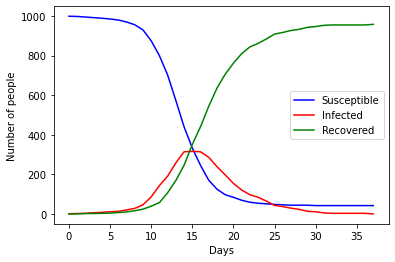

Maximum number of infected:  316


In [186]:
#print(states)
#print(n_S)
#print(n_I)
#print(n_R)

plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))


## SIRS

In [187]:
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering 
prob_S_I = 0.9
prob_I_R = 0.3
prob_R_S = 0.015

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])


while "I" in states:
    
    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


    # Update recovered
    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))

    
    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])

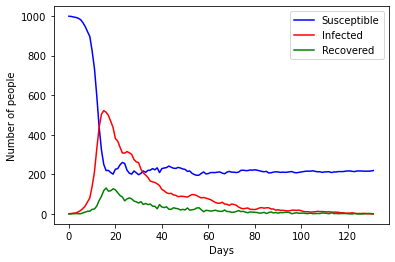

Maximum number of infected:  522


In [182]:
#print(states)
#print(n_S)
#print(n_I)
#print(n_R)

plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))

Maximum number of infected siger noget om e.g. antal hospitalspladser.. 

## SIRS with death

In [188]:
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering different states
prob_S_I = 0.95
prob_I_R = 0.2
prob_R_S = 0.8
prob_I_D = 0.06

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])
n_D = np.array([len(np.where(states == "D")[0])])


while "I" in states or "R" in states:
    
    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R", "D"]),p = np.array([1-prob_I_R - prob_I_D, prob_I_R, prob_I_D]), size = len(I_index))


    # Update recovered
    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))

    
    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
    n_D = np.concatenate([n_D, np.array([len(np.where(states == "D")[0])])])

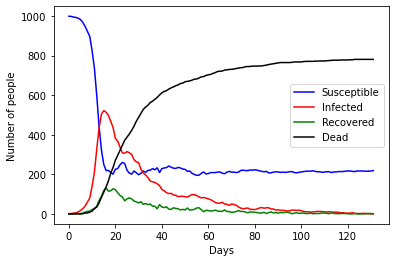

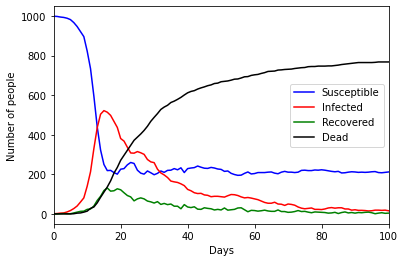

Maximum number of infected:  522
Number of dead individuals after ended epedemic:  781


In [183]:
plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.plot(n_D, "-0", label = "Dead")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.plot(n_D, "-0", label = "Dead")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.xlim(0,100)
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))
print("Number of dead individuals after ended epedemic: ", n_D[-1])


## SEIR

In [189]:
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering 
prob_S_E = 0.9
prob_I_R = 0.3

n_S = np.array([len(np.where(states == "S")[0])])
n_E = np.array([len(np.where(states == "E")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])

E_times = np.zeros(n)
E_mean = 5
E_scale = 1

while "I" in states:
    
    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    E_index = np.where(states == "E")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]
    
    # Update exposed
    E_times[E_index] = E_times[E_index] - 1
    states[np.where((E_times == 0) & (states == "E"))] = "I"

    # Update susceptible
    prob_S_E_t = prob_S_E * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S", "E"]),p = np.array([1-prob_S_E_t, prob_S_E_t]), size = len(S_index))
    
    # Assign incubation time for exposed
    E_index_new = np.where((states == "E") & (E_times == 0))
    E_times[E_index_new] = np.round(np.random.normal(loc = E_mean, scale = E_scale))
    
    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_E = np.concatenate([n_E, np.array([len(np.where(states == "E")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])


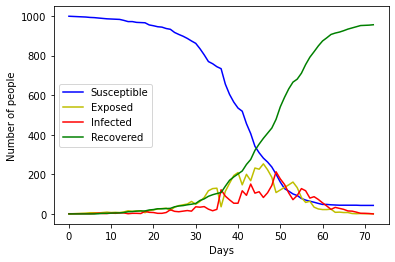

In [128]:
plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_E, "-y", label = "Exposed")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
#plt.xlim(0,100)
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))


5020
3135
